### This Notebook Written By Bilge Kaan Gürgen

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from skimage import io

import warnings
warnings.filterwarnings("ignore")


# Veri Dahil etme

In [2]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

Veri Hazırlama

In [3]:
dataset = veri(csv_file ="labelf1.csv", 
root_dir= "df1_classification/",
transform=torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(28,28)),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
    ]))
 

In [4]:
dataset

# Veri Ön İşleme


200 train ve 79 tane de test versi olsun dedik.

In [5]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=True)

In [6]:
train_set

In [7]:
train_loader

 # Veri Görselleştirme

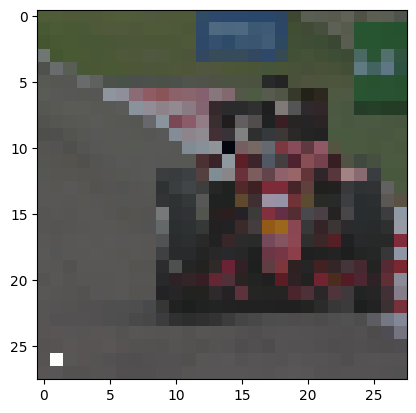

Ferrari
torch.Size([1, 3, 28, 28])


In [8]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1
classes = ["Ferrari", "McLaren","Mercedes","Redbull"]

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())

1 batch size , 3 renk kanalı rgb, 28,28 de boyutu

# Model Mimarisi

Functional ve sequential var biz functioanel kullanacağız.

In [9]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 

Bunlar genel kod olarak bulunmakta.        

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, (5,5))
        self.conv2 = nn.Conv2d(4, 8, (3,3))
        self.conv3 = nn.Conv2d(8, 16, (2,2))
        self.conv4 = nn.Conv2d(16, 32, (2,2))


        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fc1 = nn.Linear(64, 50) # tensorflow da dense diye geçiyor torch da lineer
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 100)
        self.fc4 = nn.Linear(100, 4)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.func(x)

        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)

        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)

        x = self.max(x)

        x =x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        x = self.func(x)
        x = self.fc3(x)
        x = self.func(x)
        x = self.fc4(x)
        x = self.func(x)

        return x

# Modelin Eğitimi

In [11]:
import time

In [12]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)

error = torch.nn.CrossEntropyLoss()

epoch = 10

for i in range(epoch):
    for i, (images, label) in enumerate(train_loader): # image ve label ı alıyoruz

        optimizer.zero_grad() # gradyanları sıfırlıyoruz çünkü her epochta gradyanlar toplanıyor bu yüzden baştan sıfırlıyoruz
        tahmin = model(images) 
        loss = error(tahmin, label)  # loss hesaplıyoruz
        loss.backward()  # geriyayılım yapıyoruz
        optimizer.step()  # gradyanları güncelliyoruz bir sonraki adıma geç diyoruz.
        
        print ("Epoch [{}/ {}], Loss {:.4f}".format(epoch+1, epoch, loss.item()))

end = time.time()
print("Süre: ", end - start)


Epoch [11/ 10], Loss 1.3330
Epoch [11/ 10], Loss 1.2873
Epoch [11/ 10], Loss 1.4382
Epoch [11/ 10], Loss 1.4294
Epoch [11/ 10], Loss 1.4855
Epoch [11/ 10], Loss 1.2045
Epoch [11/ 10], Loss 1.3850
Epoch [11/ 10], Loss 1.1907
Epoch [11/ 10], Loss 1.1820
Epoch [11/ 10], Loss 1.5513
Epoch [11/ 10], Loss 1.5592
Epoch [11/ 10], Loss 1.1554
Epoch [11/ 10], Loss 1.5380
Epoch [11/ 10], Loss 1.5648
Epoch [11/ 10], Loss 1.3647
Epoch [11/ 10], Loss 1.5562
Epoch [11/ 10], Loss 1.5477
Epoch [11/ 10], Loss 1.5334
Epoch [11/ 10], Loss 1.5626
Epoch [11/ 10], Loss 1.3813
Epoch [11/ 10], Loss 1.3785
Epoch [11/ 10], Loss 1.5516
Epoch [11/ 10], Loss 1.5051
Epoch [11/ 10], Loss 1.5428
Epoch [11/ 10], Loss 1.3719
Epoch [11/ 10], Loss 1.1940
Epoch [11/ 10], Loss 1.3650
Epoch [11/ 10], Loss 1.5222
Epoch [11/ 10], Loss 1.4807
Epoch [11/ 10], Loss 1.5232
Epoch [11/ 10], Loss 1.4749
Epoch [11/ 10], Loss 1.3611
Epoch [11/ 10], Loss 1.2368
Epoch [11/ 10], Loss 1.2344
Epoch [11/ 10], Loss 1.3562
Epoch [11/ 10], Loss

# Model Testi

In [13]:
def dogruluk(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval() # modeli test moduna alıyoruz

    with torch.no_grad(): # gradyanları hesaplamıyoruz
        for x, y in loader:
            tahmin = model(x)
            _, pred = tahmin.max(1)
            num_correct += (pred == y).sum()
            num_samples += pred.size(0)

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train() # modeli tekrar eğitim moduna alıyoruz
    

   


In [14]:
print("Train seti için doğruluk: ")
dogruluk(train_loader, model)
print("Test seti için doğruluk: ")
dogruluk(test_loader, model)

Train seti için doğruluk: 
Got 172 / 200 with accuracy 86.00
Test seti için doğruluk: 
Got 54 / 79 with accuracy 68.35


# Model Test 2

Adamax algoritması ile sonuç

In [15]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)

error = torch.nn.CrossEntropyLoss()

epoch = 10

acc_list = []
loss_list = []
count = 0
iterasyon_list = []
for i in range(epoch):
    for i, (images, label) in enumerate(train_loader): # image ve label ı alıyoruz

        optimizer.zero_grad() # gradyanları sıfırlıyoruz çünkü her epochta gradyanlar toplanıyor bu yüzden baştan sıfırlıyoruz
        tahmin = model(images) 
        loss = error(tahmin, label)  # loss hesaplıyoruz
        loss.backward()  # geriyayılım yapıyoruz
        optimizer.step()  # gradyanları güncelliyoruz bir sonraki adıma geç diyoruz.

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            correct_hata = 0

            for images, labels in test_loader:
                out= model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct += (pred == labels).sum()
                correct_hata += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * correct_hata / float(total)


            acc_list.append(dogruluk)
            loss_list.append(loss.data)
            iterasyon_list.append(count)

        if count % 100 == 0:
            print("Iteration: {}. Loss: {}. Accuracy: {}".format(count, loss.data, dogruluk, hata))
        
end = time.time()
print("Süre: ", end - start)



Iteration: 100. Loss: 1.422223448753357. Accuracy: 24.05063247680664
Iteration: 200. Loss: 1.526026964187622. Accuracy: 37.97468185424805
Iteration: 300. Loss: 1.1837401390075684. Accuracy: 43.0379753112793
Iteration: 400. Loss: 1.3745015859603882. Accuracy: 36.7088623046875
Iteration: 500. Loss: 0.7083414196968079. Accuracy: 46.83544158935547
Iteration: 600. Loss: 0.9039085507392883. Accuracy: 51.89873504638672
Iteration: 700. Loss: 1.3790075778961182. Accuracy: 64.55696105957031
Iteration: 800. Loss: 0.519200325012207. Accuracy: 62.02531814575195
Iteration: 900. Loss: 0.7747589349746704. Accuracy: 51.89873504638672
Iteration: 1000. Loss: 1.069911241531372. Accuracy: 63.2911376953125
Iteration: 1100. Loss: 0.325581431388855. Accuracy: 60.75949478149414
Iteration: 1200. Loss: 0.05609125271439552. Accuracy: 68.35443115234375
Iteration: 1300. Loss: 0.08211615681648254. Accuracy: 63.2911376953125
Iteration: 1400. Loss: 0.15329308807849884. Accuracy: 65.82278442382812
Iteration: 1500. Loss

Adam ile sonuçlar

In [16]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

error = torch.nn.CrossEntropyLoss()

epoch = 10
acc_list = []
loss_list = []
count = 0
iterasyon_list = []
for i in range(epoch):
    for i, (images, label) in enumerate(train_loader): # image ve label ı alıyoruz

        optimizer.zero_grad() # gradyanları sıfırlıyoruz çünkü her epochta gradyanlar toplanıyor bu yüzden baştan sıfırlıyoruz
        tahmin = model(images) 
        loss = error(tahmin, label)  # loss hesaplıyoruz
        loss.backward()  # geriyayılım yapıyoruz
        optimizer.step()  # gradyanları güncelliyoruz bir sonraki adıma geç diyoruz.

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            correct_hata = 0

            for images, labels in test_loader:
                out= model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct += (pred == labels).sum()
                correct_hata += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * correct_hata / float(total)

            acc_list.append(dogruluk)
            loss_list.append(loss.data)
            iterasyon_list.append(count)

        if count % 100 == 0:
            print("Iteration: {}. Loss: {}. Accuracy: {}".format(count, loss.data, dogruluk, hata))
        
end = time.time()
print("Süre: ", end - start)



Iteration: 100. Loss: 1.3509094715118408. Accuracy: 41.772151947021484
Iteration: 200. Loss: 0.956984281539917. Accuracy: 56.9620246887207
Iteration: 300. Loss: 0.6150650978088379. Accuracy: 58.227848052978516
Iteration: 400. Loss: 1.0371453762054443. Accuracy: 60.75949478149414
Iteration: 500. Loss: 0.0394563153386116. Accuracy: 59.49367141723633
Iteration: 600. Loss: 1.1544253826141357. Accuracy: 62.02531814575195
Iteration: 700. Loss: 0.9100441932678223. Accuracy: 72.15190124511719
Iteration: 800. Loss: 0.1815503090620041. Accuracy: 67.08860778808594
Iteration: 900. Loss: 0.3133660554885864. Accuracy: 69.62025451660156
Iteration: 1000. Loss: 0.6512543559074402. Accuracy: 64.55696105957031
Iteration: 1100. Loss: 0.2564446032047272. Accuracy: 75.9493637084961
Iteration: 1200. Loss: 0.6280215382575989. Accuracy: 68.35443115234375
Iteration: 1300. Loss: 1.5718371868133545. Accuracy: 62.02531814575195
Iteration: 1400. Loss: 2.563927173614502. Accuracy: 75.9493637084961
Iteration: 1500. L

# Model Save  

Model ağırlıklrını kaydetme sadece bir üstteki ağırlıkları almak demektir.
Modeli kaydetme ise yukarıdaki model mimarisini de kaydetme demektir.

Model kaydetme

In [17]:
torch.save(model, "udemy1.pth") # modeli kaydediyoruz

Ağırlık kaydetme

In [18]:
torch.save(model.state_dict(), "udemy2.pth") # sadece ağırlıkları kaydediyoruz

# Model Load

In [19]:
model1 = torch.load("udemy1.pth")  # modeli yüklüyoruz

In [20]:
model11 = Net() # yüklemeseydik model yok diye hata alırdık. 
model11.load_state_dict(torch.load("udemy2.pth")) # modeli yüklüyoruz
model11.eval() 

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=4, bias=True)
)

In [21]:
def dogruluk(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval() 

    with torch.no_grad(): 
        for x, y in loader:

            tahmin = model(x)
            _, pred = tahmin.max(1)
            num_correct += (pred == y).sum()
            num_samples += pred.size(0)

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train() 

Model Pred

In [22]:
print("Train seti için doğruluk: ")
dogruluk(train_loader, model1)
print("Test seti için doğruluk: ")
dogruluk(test_loader, model1)

Train seti için doğruluk: 
Got 179 / 200 with accuracy 89.50
Test seti için doğruluk: 
Got 61 / 79 with accuracy 77.22


Weights pred

In [23]:
print("Train seti için doğruluk: ") 
dogruluk(train_loader, model11) 
print("Test seti için doğruluk: ")
dogruluk(test_loader, model11)

Train seti için doğruluk: 
Got 179 / 200 with accuracy 89.50
Test seti için doğruluk: 
Got 61 / 79 with accuracy 77.22


# Summary

In [24]:
!pip install torch-summary

In [25]:
from torchsummary import summary
summary(model, (3, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 4, 24, 24]           304
├─ELU: 1-2                               [-1, 4, 24, 24]           --
├─MaxPool2d: 1-3                         [-1, 4, 12, 12]           --
├─Conv2d: 1-4                            [-1, 8, 10, 10]           296
├─ELU: 1-5                               [-1, 8, 10, 10]           --
├─MaxPool2d: 1-6                         [-1, 8, 5, 5]             --
├─Conv2d: 1-7                            [-1, 16, 4, 4]            528
├─ELU: 1-8                               [-1, 16, 4, 4]            --
├─MaxPool2d: 1-9                         [-1, 16, 2, 2]            --
├─Linear: 1-10                           [-1, 50]                  3,250
├─ELU: 1-11                              [-1, 50]                  --
├─Linear: 1-12                           [-1, 50]                  2,550
├─ELU: 1-13                              [-1, 50]                  --
├─Line

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 4, 24, 24]           304
├─ELU: 1-2                               [-1, 4, 24, 24]           --
├─MaxPool2d: 1-3                         [-1, 4, 12, 12]           --
├─Conv2d: 1-4                            [-1, 8, 10, 10]           296
├─ELU: 1-5                               [-1, 8, 10, 10]           --
├─MaxPool2d: 1-6                         [-1, 8, 5, 5]             --
├─Conv2d: 1-7                            [-1, 16, 4, 4]            528
├─ELU: 1-8                               [-1, 16, 4, 4]            --
├─MaxPool2d: 1-9                         [-1, 16, 2, 2]            --
├─Linear: 1-10                           [-1, 50]                  3,250
├─ELU: 1-11                              [-1, 50]                  --
├─Linear: 1-12                           [-1, 50]                  2,550
├─ELU: 1-13                              [-1, 50]                  --
├─Line

# Loss Görsellleştirme

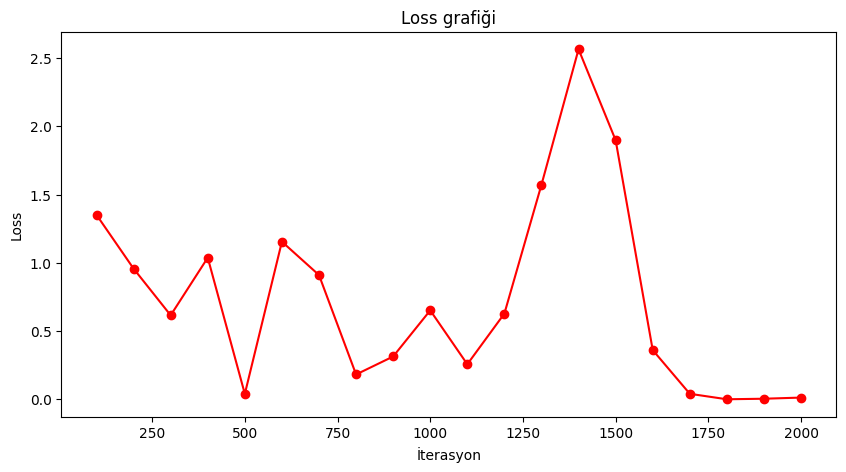

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Loss grafiği")
plt.plot(iterasyon_list, loss_list,"-o", color="red")

plt.xlabel("İterasyon")
plt.ylabel("Loss")

plt.show()

# Accuracy Görselleştirme

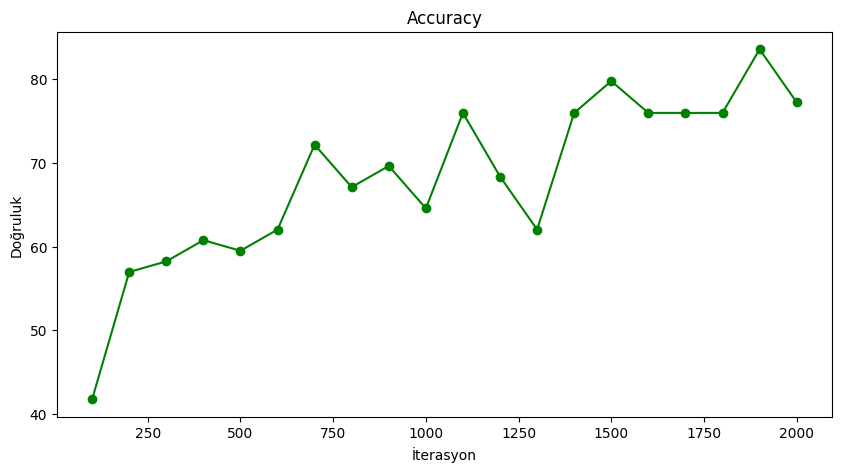

In [29]:
plt.figure(figsize=(10, 5))
plt.title("Accuracy")
plt.plot(iterasyon_list, acc_list,"-o", color="green")

plt.xlabel("İterasyon")
plt.ylabel("Doğruluk")

plt.show()

# Test Verisinden Tahmin

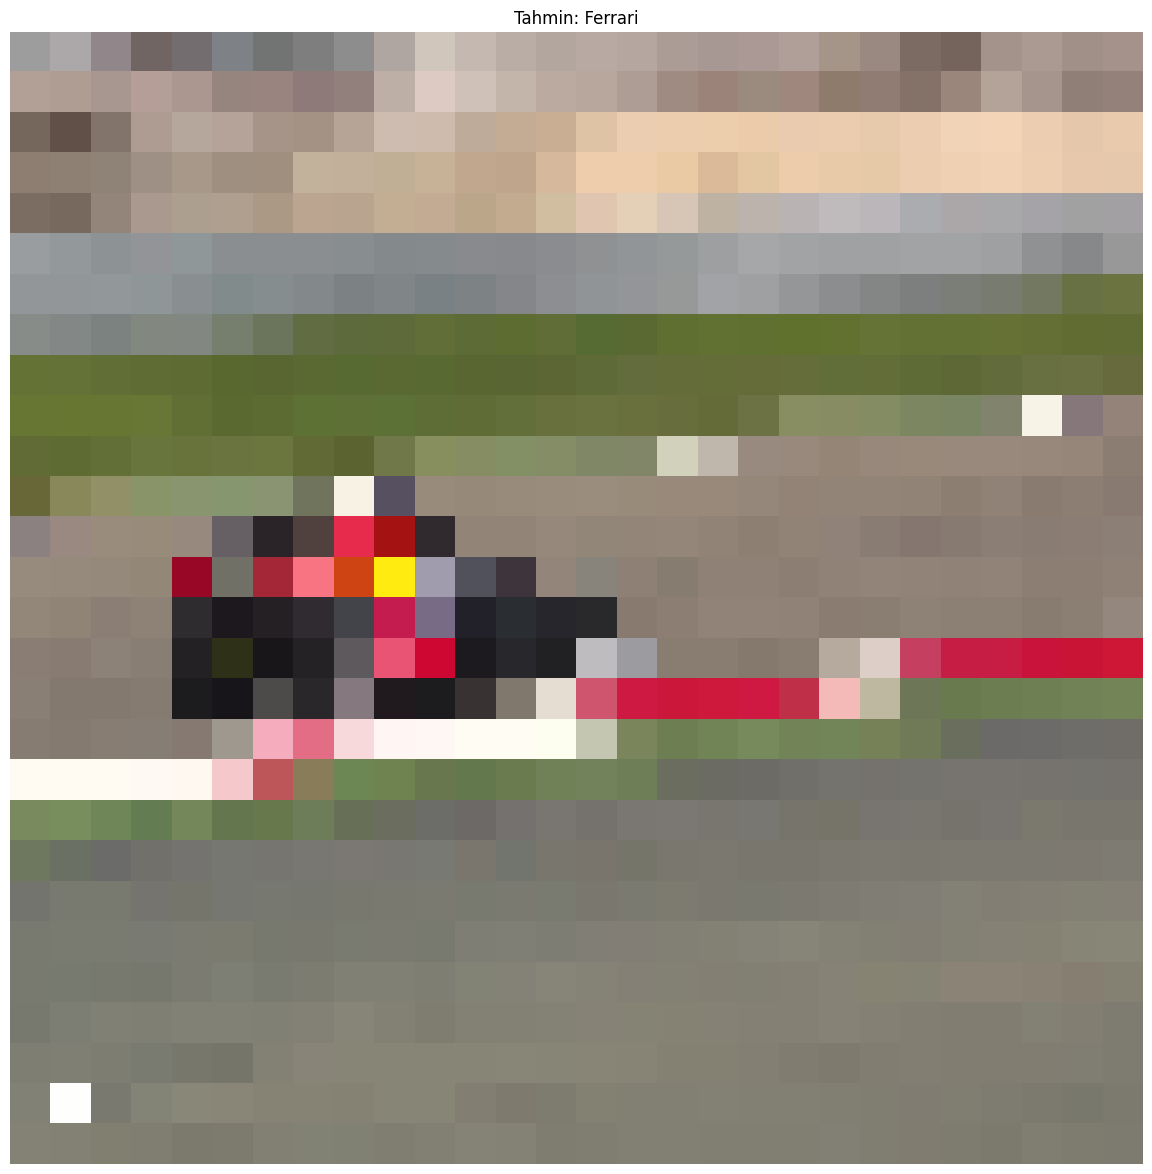

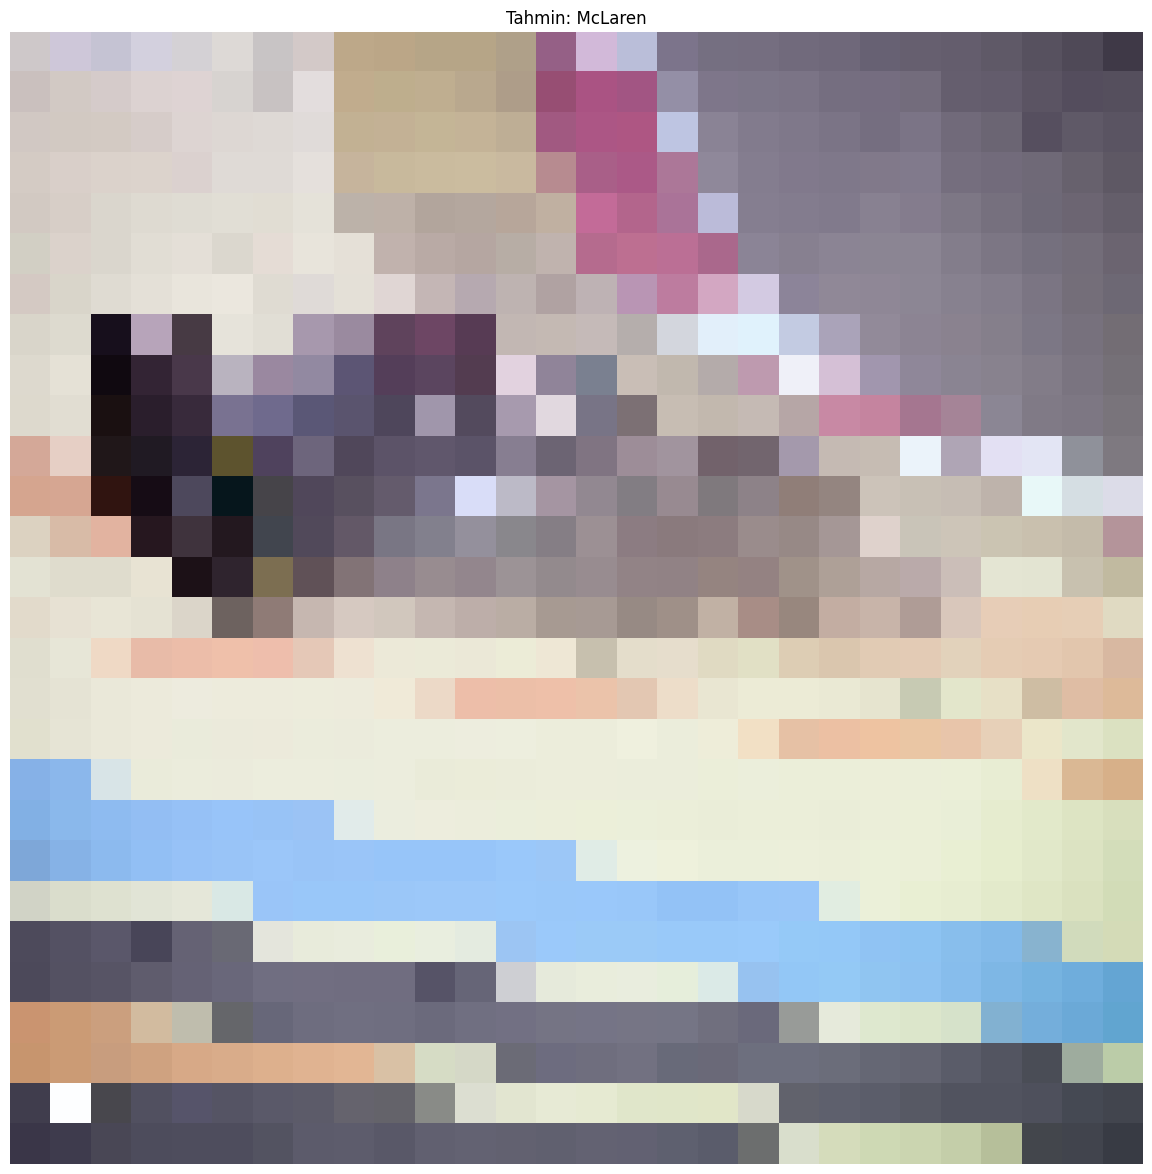

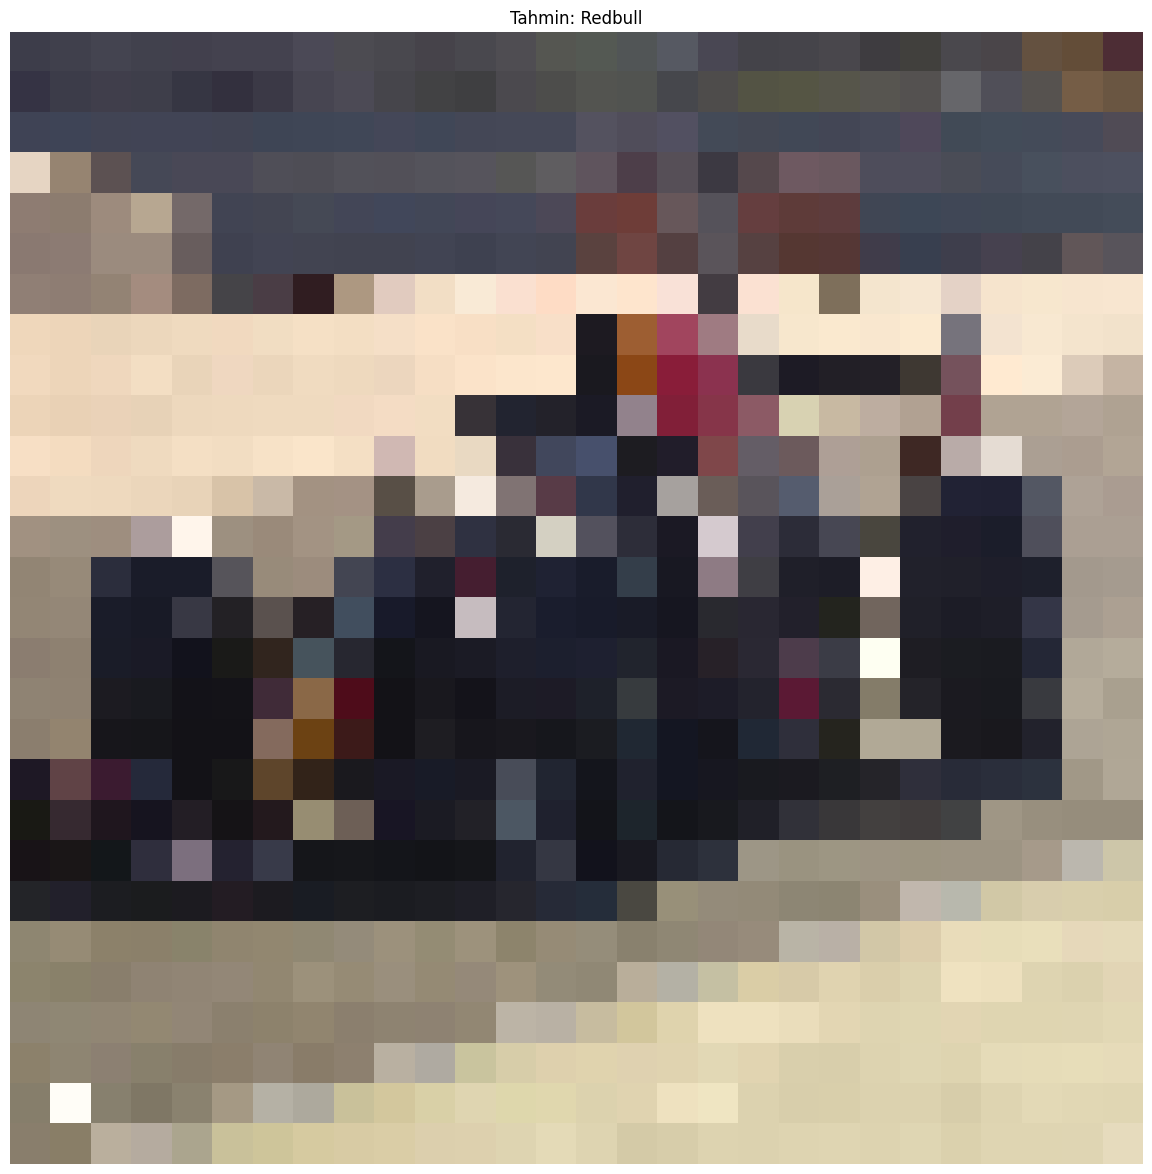

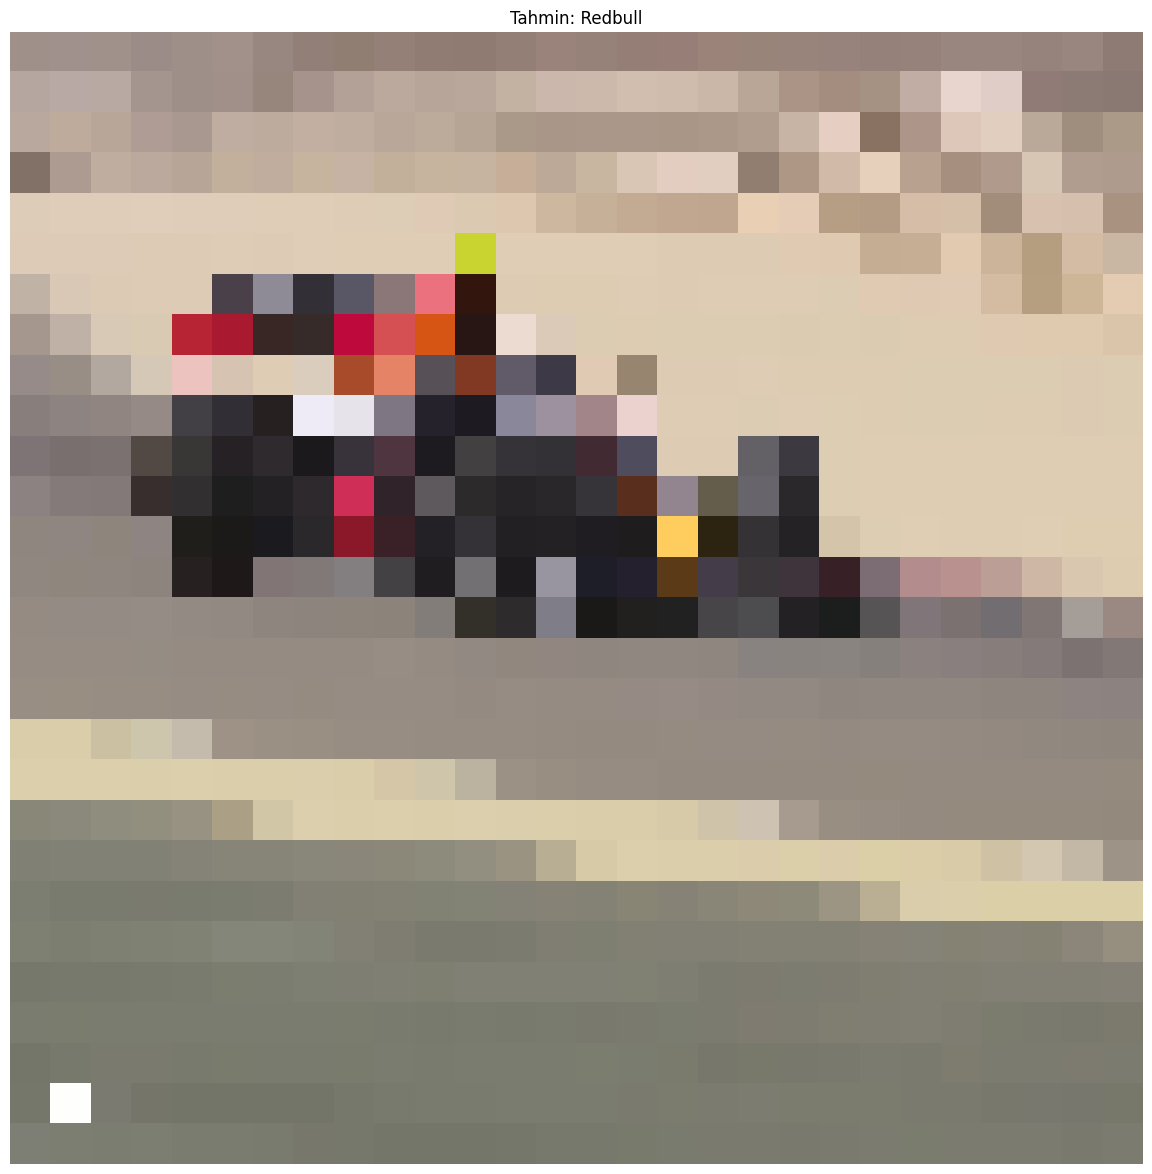

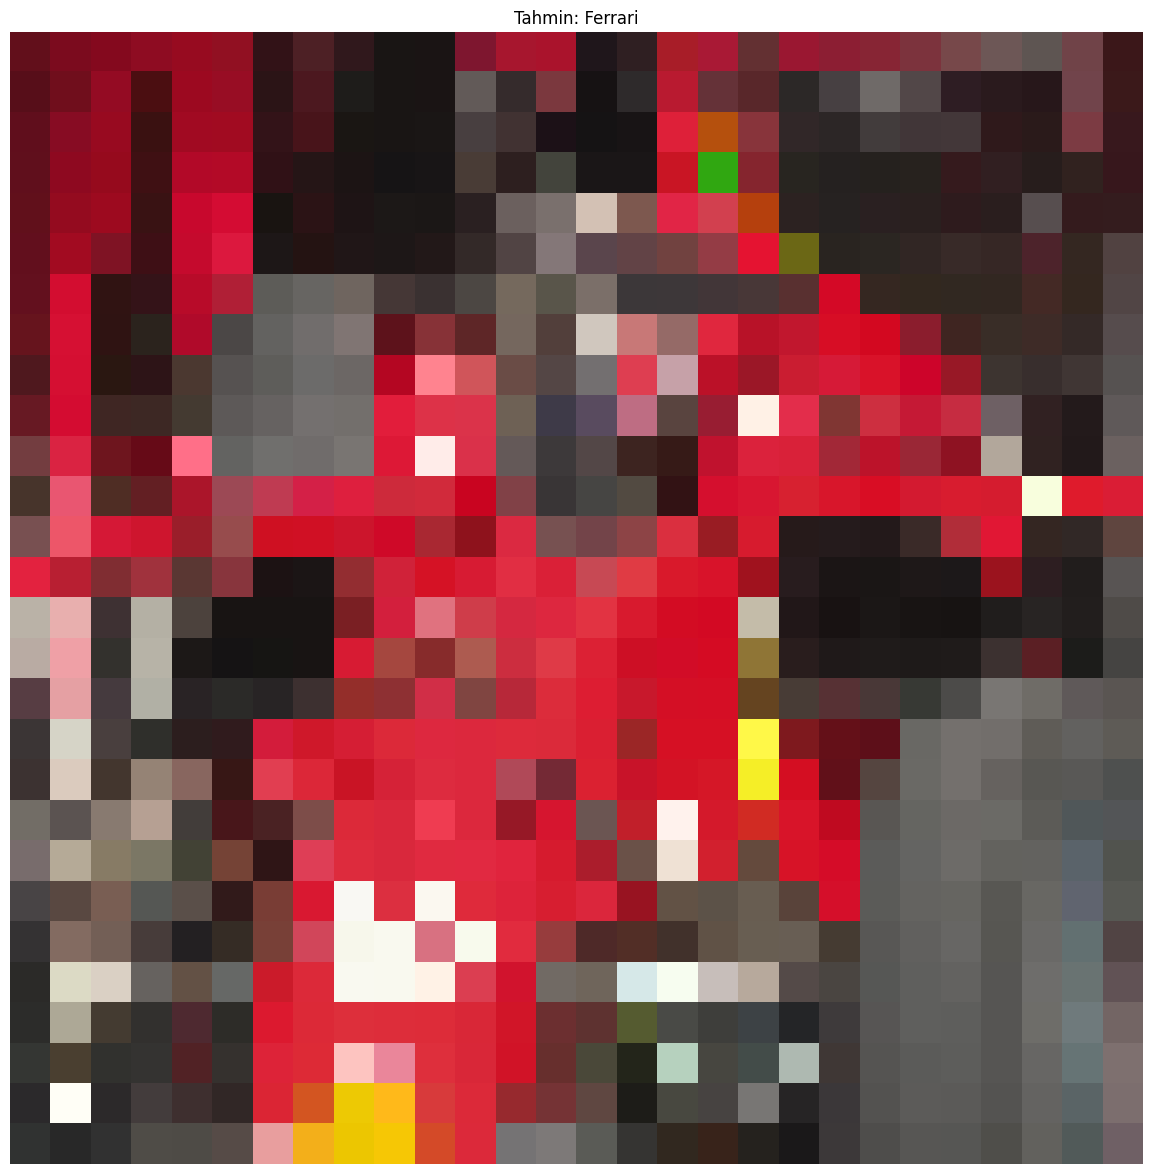

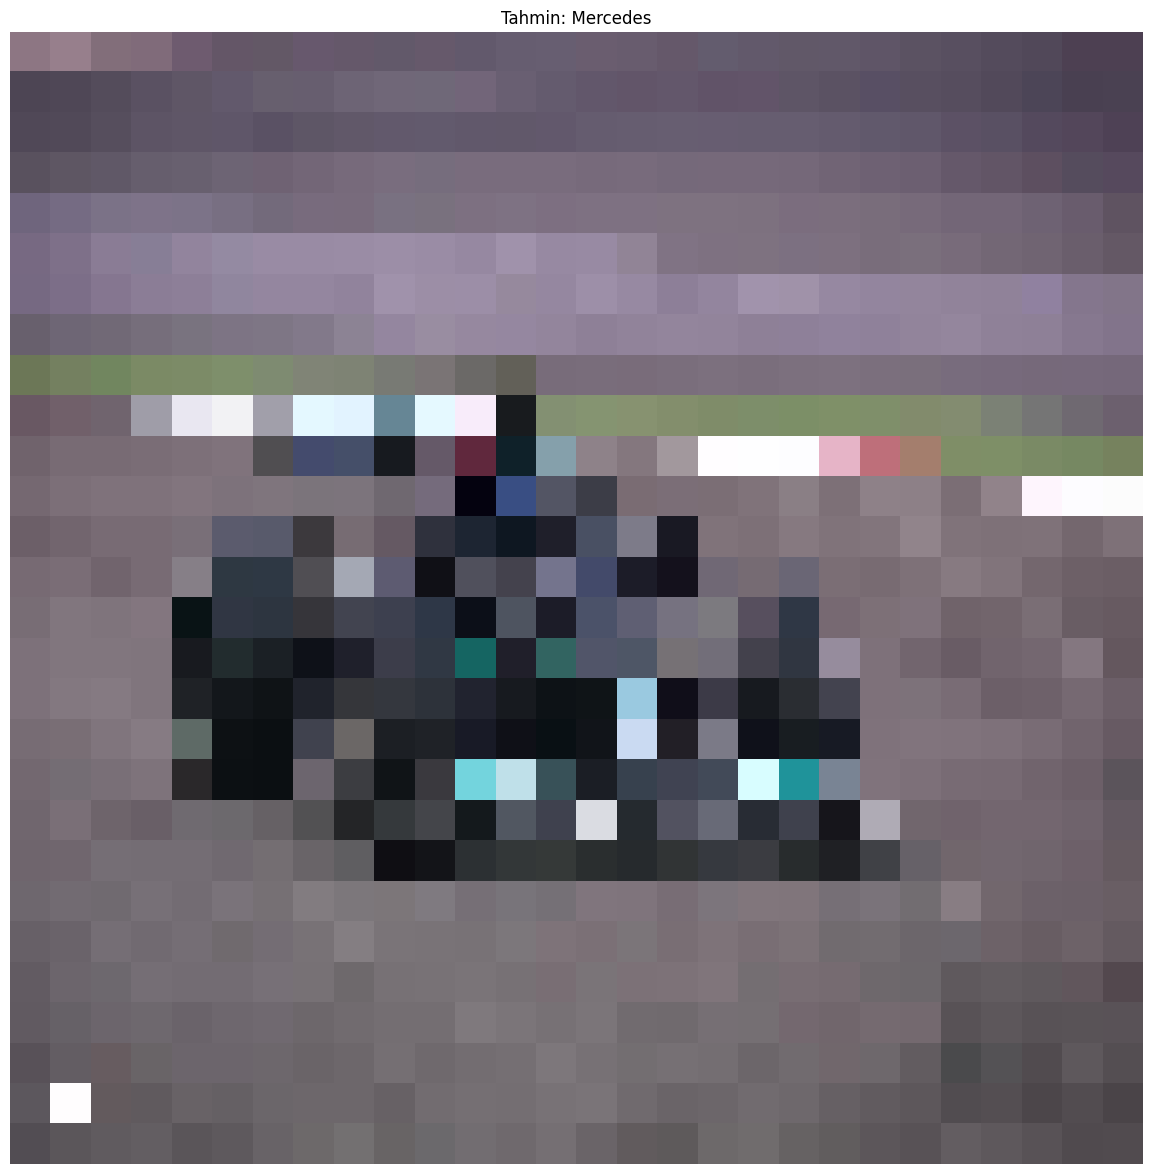

In [40]:
class_name = ["Ferrari","McLaren","Mercedes","Redbull"]
 
def display(model, image_number = 6):
    was_training = model.training
    model.eval() # Modelimizi değerlendirme durumuna ayarlıyoruz.
    img_number = 0
    with torch.no_grad():
        for i,(image,label) in enumerate(test_loader):
            predict_output = model(image)
            _,pred = torch.max(predict_output,1)
 
            for j in range(image.size()[0]):
                plt.figure(figsize=(50,50))
                img_number = img_number + 1
                ax = plt.subplot(image_number//2,2,img_number)
                ax.axis("off")
                ax.set_title(f"Tahmin: {class_name[pred[j]]}")
 
                imshow(image.cpu().data[j]) # Tüm parametre ve ara bellek değerlerimiz CPU'ya taşınmaktadır. Tensor ifadelerini vermektedir.
 
                if img_number == image_number:
                    model.train(mode=was_training)
                    return
display(model)

# Sequential Model Oluşturma

In [ ]:
model=nn.Sequential(
    nn.Conv2d(3, 4, (5,5)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(4, 8, (3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(8, 16, (2,2)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(16, 32, (2,2)),
    nn.ReLU(),

    nn.Flatten(),

    nn.Linear(32, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Linear(100, 4)
)